# Transformada de Fourier discreta (DFT)

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Definición

La [transformada de Fourier discreta](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) (DFT) se define como

\begin{equation}
\boxed{\tilde{F}[k] = \frac{1}{N} \sum_{n=0}^{N-1} \tilde{f}[n] \; e^{-i k \frac{2 \pi}{N} n}}
\end{equation}

donde $N \in \mathbb{N}$ denota la longitud de la DFT y $k \in \mathbb{Z}$ la frecuencia discreta. La DFT asigna una señal discreta $\tilde{f}[n]$ a su espectro discreto $\tilde{F}[k] = \text{DFT}_N \{ \tilde{f}[n] \}$. Dado que la base $e^{-i k \frac{2 \pi}{N} n}$ es periódica de período $N$ con respecto a la frecuencia discreta $k$, el espectro $F[k]$ es también periódico de período $N$

\begin{equation}
\tilde{F}[k] = \tilde{F}[k + \nu N]
\end{equation}

con $\nu \in \mathbb{Z}$. De la periodicidad se desprende que el rango único para $k = 0,1, \dots, N-1$. Para $n = 0,1, \dots, N-1$, la transformada discreta inversa de Fourier (IDFT) se define como

\begin{equation}
\boxed{\tilde{f}[n] = \sum_{k=0}^{N-1} \tilde{F}[k] \; e^{i k \frac{2 \pi}{N} n}}
\end{equation}

La base $e^{i k \frac{2 \pi}{N} n}$ de la IDFT es periódica con respecto al índice de muestra $n$. Se deduce que $f[n] = \text{IDFT}_N \{ F[k] \}$ es periódica:

\begin{equation}
\tilde{f}[n] = \tilde{f}[n + \nu N]
\end{equation}

Aunque $n$ y $k$ pueden tomar cualquier valor entero, se puede concluir a partir de la periodicidad, que la DFT solo es única para $k, \mu = 0, 1, \dots N-1$. Como se muestra más adelante, la periodicidad de la DFT y la IDFT tiene amplias consecuencias para las propiedades y teoremas de la DFT.

Las bases de la DFT a menudo se representan en términos de la $N$-ésima [raíz de la unidad](./A1-Fundamentos_matematicos.ipynb#raices_unidad) y se abrevian mediante la variable $W_N = e^{-i \frac{2 \pi}{N}}$

\begin{equation}
\tilde{F}[k] = \frac{1}{N} \sum_{n=0}^{N-1} \tilde{f}[n] \; W_N^{k n}
\end{equation}

<div class="alert alert-block alert-info">
La bases de la IDFT se encuentran invirtiendo el signo del exponente de $W_N$. Otras definiciones comunes de la DFT y de la IDFT se pueden encontrar en la literatura. Difieren con respecto al signo del exponente y el factor de normalización $\frac{1}{N}$. Como consecuencia, las propiedades, teoremas y transformaciones pueden diferir de las que se dan aquí.
</div>

### La DFT sólo tiene sentido para señales discretas periódicas

Cuando se calcula la DFT de una secuencia, la DFT asume que ésta es una secuencia períodica. Esto se ilustra en el siguiente código: 

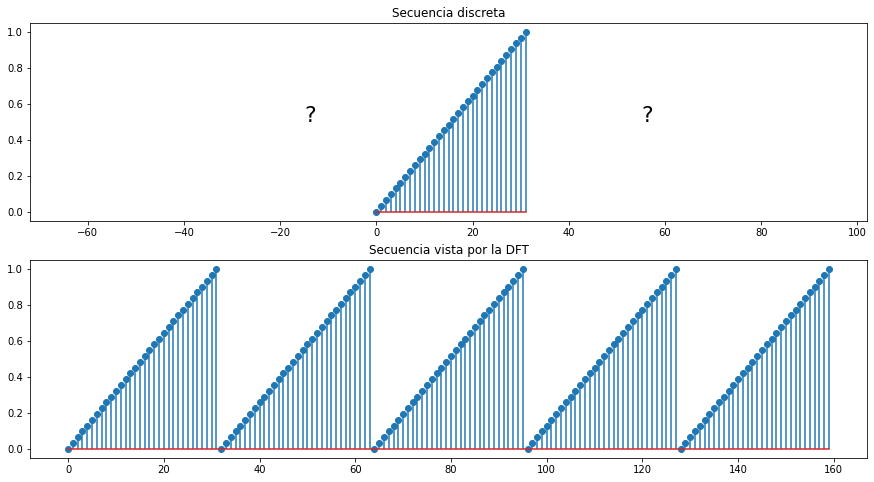

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8))
plt.subplot(2,1,1) 

n = np.arange(32)
xn = np.linspace(0, 1, len(n))
plt.stem(n, xn, use_line_collection=True);
plt.text(-15, 0.5, "?", fontsize=22)
plt.text(55, 0.5, "?", fontsize=22)
plt.xlim(-72,102)
plt.title('Secuencia discreta')

xn_periodic = np.hstack([xn]*5)

plt.subplot(2,1,2)
plt.stem(xn_periodic, use_line_collection=True)
plt.title('Secuencia vista por la DFT')

plt.show()

### Relación con la DTFT

La [transformada de Fourier de tiempo discreto (DTFT)](./32-DTFT.ipynb) $\tilde{F}(u) = \mathcal{F}\{ f[n] \}$ de una señal causal de longitud finita $N$, lo que implica que $f[n] = 0$ para $n \in \mathbb{Z}\setminus\{0,1,\dots, N-1 \}$, es continua con respecto a la frecuencia normalizada $uT$. La DFT $\tilde{F}[k]$ de la misma señal es discreta. Para derivar la relación entre ambas transformaciones, la definición de la DTFT se puede comparar con la definición de la DFT. Se puede ver que ambas están unidas por

\begin{equation}
\tilde{F}[k] = \tilde{F}(u) \big\rvert_{u = \frac{k}{NT}}
\end{equation}

Vemos que la DFT puede derivarse [muestreando](./23-Muestreo_e_interpolacion.ipynb) la DTFT de manera equidistante en $u = \frac{k}{NT}$. El término $N$ aparece en este muestreo debido a la [resolución en tiempo y frecuencia](./36-Apodizacion_y_Derrame.ipynb#nut1) en señales que son periódicas y de largo finito.

### Relación con la DFFT

La [transformada de Fourier de frecuencia discreta (DFFT)](./33-DFFT.ipynb)  $F[k] = \mathcal{F}\{ \tilde{f}(t) \}$ de una señal periódica continua, es discreta en la frecuencia, tal como la DFT $\tilde{F}[k]$. La transformada inversa IDFFT de una señal discreta aperiódica es continua en el tiempo. La inversa IDFT de la misma señal es discreta en el tiempo. Para derivar la relación entre ambas transformaciones, la definición de la DFFT se puede comparar con la definición de la DFT. Se puede ver que ambas están unidas por el [muestreo](./23-Muestreo_e_interpolacion.ipynb) en el tiempo de la función $\tilde{f}(t)$, es decir:

\begin{equation}
\tilde{f}[n] = \tilde{f}(t) \big\rvert_{t = \frac{nT}{N}}
\end{equation}

Vemos que la DFT puede derivarse [muestreando](./23-Muestreo_e_interpolacion.ipynb) la DFFT de manera equidistante en $t = \frac{nT}{N}$.

El término $N$ aparece en este muestreo debido a la [resolución en tiempo y frecuencia](./36-Apodizacion_y_Derrame.ipynb#nut1) en señales que son periódicas y de largo finito.

### Información contenida en la DFT


Es válido cuestionarse si la DFT $\tilde{F}[k]$ representa completamente una señal discreta $f[n]$ de longitud finita. Para comprobar esta idea, podemos calcular la DTFT de una señal discreta, que sabemos que es periódica de período $1/T$. Esto también es válido para una señal discreta $f[n]$ de longitud finita. Ahora, el espectro de una señal periódica consiste en una serie de impulsos de Dirac ponderados. Se puede describir completamente por los pesos (magnitudes) de los impulsos. Lo mismo se aplica también para el espectro $\tilde{F}(u)$ de la continuación periódica $\tilde{f}[n] = \sum_{\kappa = - \infty}^{\infty} f[n - \kappa N]$ de la señal de longitud finita $f[n]$. Las ponderaciones de los impulsos están dados por el muestreo equidistante del espectro de un período $F(u)$ en $u = \frac{k}{NT}$. Esto se muestra a continuación

![DTFT de una señal discreta de longitud finita y su continuación periódica](images/34/DTFTcontinuacion.png)

<div class="alert alert-block alert-info">
Se puede concluir del razonamiento anterior que la DFT de una señal discreta causal de longitud finita contiene toda la información que hay sobre la señal.
</div>

## Relación entre FT, DTFT, DFFT y DFT

En la siguiente imagen vemos la relación entre las Transformadas continuas y discretas de Fourier. 

![Transformadas de Fourier](images/34/FTs.png)

Como se observa en la figura, la DTFT se relaciona con la Transformada de Fourier Continua (FT) mediante un [muestreo](./23-Muestreo_e_interpolacion.ipynb) en el tiempo. La DFFT se relaciona con la FT mediante un [muestreo](./23-Muestreo_e_interpolacion.ipynb) en frecuencia. Si la DTFT se muestrea en frecuencia, se obtiene la DFT. De la misma manera, si se [muestreo](./23-Muestreo_e_interpolacion.ipynb) la DFFT en el tiempo, también se obtiene la DFT. Y la FT se relaciona con la DFT mediante un [muestreo](./23-Muestreo_e_interpolacion.ipynb) tanto en tiempo como en frecuencia.

En mucho textos se utilizan nombres alternativos para todas estas Transformadas. Por ejemplo, en la siguiente nomenclatura se diferencia entre tiempo continuo y discreto (CT vs DT) y entre frecuencia continua (Transformada) y frecuencia discreta (Series).

- FT: Transformada de Fourier de tiempo continuo (CTFT)
- DTFT: Transformada de Fourier de tiempo discreto (DTFT)
- DFFT: Series de Fourier de tiempo continuo (CTFS)
- DFT: Series de Fourier de tiempo discreto (DTFS)



***
### Interpretación del espectro

Para una interpretación adicional de la frecuencia discreta $k$, recordamos el vínculo entra la DFT y la DTFT. La DFT $\tilde{F}[k]$ puede derivarse de la DTFT muestreando $F(u)$ en $u = \frac{k}{NT}$. La DTFT $F(u)$ se muestrea en el rango de $0 \leq u < 1/T$. Dado que la DTFT es periódica de período de $1/T$, se puede concluir que la DTFT $F(u)$ para $\frac{1}{2T} < u < \frac{1}{T}$ es igual a la DTFT para $-\frac{1}{2T} < u < 0$. Se deduce que la DFT $F[k]$ para $\frac{N}{2} < k \leq (N-1)$ es igual a la DTFT muestreada en las frecuencias negativas normalizadas $-\frac{1}{2T} < u < 0$. El eje de frecuencia normalizado resultante de la DFT se ilustra para el caso de una longitud par.

![Ejes de frecuencia de la DFT](images/34/frequency_grid.png)

Se observa como la frecuencia que una DFT representa se encuentra en el intervalo $[-\frac{1}{2T},\frac{1}{2T}]$. En el caso en que la frecuencia esté calculada en radianes, este intervalo es $[-\pi,\pi]$. Dado que la DFT es una secuencia periódica, también se puede representar la información en los intervalos $[0,\frac{1}{T}]$, o bien $[0,2\pi]$ en radianes.

<a name="representacion_matricial"></a>
***
## Representación matricial

La definición anterior de la DFT se da en términos de una suma sobre las muestras $f[n]$ para $n=0, 1, \dots, N-1$. La suma debe evaluarse para $k = 0, 1, \dots, N-1$ para obtener la DFT $F[k] = \text{DFT}_N \{ f[n] \}$. Este cálculo se puede representar en términos de una multiplicación matricial. Primero, las $N$ muestras de la señal $f[n]$ se combinan en el vector $N \times 1$

\begin{equation}
\mathbf{f} = \left[ f[0], f[1], \dots, f[N-1] \right]^T
\end{equation}

De la misma manera, las muestras $N$ del espectro $F[k]$ se combinan en el vector $N \times 1$

\begin{equation}
\mathbf{F} = \left[ F[0], F[1], \dots, F[N-1] \right]^T
\end{equation}

El cálculo de todos los valores $N$ de $F[k]$ a partir de todos los valores $N$ de $f[n]$ ahora se puede expresar como el producto matricial:

\begin{equation}
\mathbf{F} = \frac{1}{N} \cdot \mathbf{W} \mathbf{f}
\end{equation}

donde la [matriz DFT (*Wikipedia*)](https://en.wikipedia.org/wiki/DFT_matrix) de $N \times N$ se define como

\begin{equation}
\mathbf{W} = \left[ \begin{array}{ccccc}
1 & 1 & 1 & \dots & 1 \\
1 & W_N & W_N^2 & \dots & W_N^{N-1} \\
1 & W_N^2 & W_N^6 & \dots & W_N^{2 (N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & W^{N-1} & W^{2(N-1)} & \dots & W^{(N-1)(N-1)}
\end{array} \right]
\end{equation}

Esta matriz DFT es, sin considerar el factor de escala $N$, [unitaria](https://en.wikipedia.org/wiki/Unitary_matrix), es decir:

\begin{equation}
\mathbf{W} \, \mathbf{W}^H = N \cdot \mathbf{I}
\end{equation}

donde $(\cdot)^H$ denota el [Hermitiano](https://en.wikipedia.org/wiki/Hermitian_adjoint) (el transpuesto conjugado) de una matriz y $\mathbf{I}$ la [matriz de identidad](https://en.wikipedia.org/wiki/Identity_matrix) de $N \times N$ . 

La representación matricial de la DFT inversa es:

\begin{equation}
\mathbf{f} = \mathbf{W}^H \mathbf{F}
\end{equation}

La representación matricial de la DFT es útil para la discusión de sus propiedades y su implementación. Las funciones para el cálculo de la matriz DFT están diponibles en todos los ambientes de computación científica. A continuación, se utiliza la función de Python [`scipy.linalg.dft`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.dft.html). La parte real de las variables $W_N^k$ para $k=0, 1, \dots, N-1$ se grafica para ilustrar como son las bases de la DFT. La aplicación de la representación vectorial se verá a continuación.

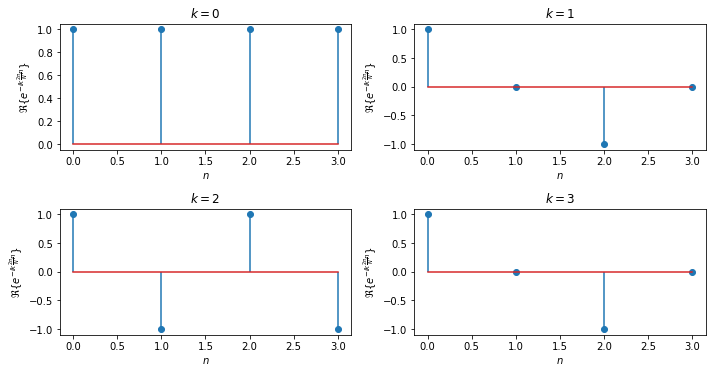

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import dft

N = 4
F = dft(N)

plt.figure(figsize=(10, 10))
for n in range(N):
    ax = plt.subplot(4, 2, n+1)
    ax.stem(np.real(F[:, n]),use_line_collection=True)
    plt.title('$k = %d$'%n)
    plt.ylabel(r'$\Re \{ e^{-i k \frac{2 \pi}{N} n} \}$')
    plt.xlabel('$n$')
plt.tight_layout()

plt.show()

El módulo `sympy` de Python contiene la matriz DFT, de acuerdo a la siguiente definición:

In [3]:
import sympy.physics.matrices as m

m.mdft(4)

Matrix([
[1/2,  1/2,  1/2,  1/2],
[1/2, -I/2, -1/2,  I/2],
[1/2, -1/2,  1/2, -1/2],
[1/2,  I/2, -1/2, -I/2]])

Vemos que esta implementación multiplica por $\frac{1}{2}$, que es un factor distinto al que hemos utilizado. Observamos que la implementación difiere de la que utiliza `numpy`, la cual utiliza un factor de $1$, y no multiplica en la DFT por el factor $\frac{1}{N}$.

In [4]:
import numpy as np

N = 4
dftmtx = np.fft.fft(np.eye(N))

dftmtx

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j,  0.-1.j, -1.+0.j,  0.+1.j],
       [ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j],
       [ 1.+0.j,  0.+1.j, -1.+0.j,  0.-1.j]])

Observando las expresiones anteriores, es claro que la matriz DFT está construída de rotaciones de un vector en el círculo unitario. Quizás una representación gráfica que captura de mejor forma la estructura de la matriz DFT, para el caso $N=4$, es ésta:

$$ \mathbf{W}(4) = \begin{bmatrix} \rightarrow & \rightarrow & \rightarrow & \rightarrow \\ \rightarrow & \downarrow & \leftarrow & \uparrow \\ \rightarrow & \leftarrow & \rightarrow & \leftarrow \\ \rightarrow & \uparrow & \leftarrow & \downarrow \end{bmatrix} $$

***
### DFT del impulso de Dirac

La $\text{DFT}_N \{ \delta[n] \}$ del [impulso de Dirac](./26-Funciones_importantes_discretas.ipynb#impulso) se obtiene al introducir $\delta[n]$ en la definición de la DFT y al utilizar la propiedad del cedazo:

\begin{equation}
\text{DFT}_N \{ \delta[n] \} = \frac{1}{N} \sum_{n = 0}^{N-1} \delta[n] \, e^{-i k \frac{2 \pi}{N} n} = \frac{1}{N}
\end{equation}

Notamos que en este caso, dado que la DFT solo tiene sentido para señales periódicas, el impulso utilizado aquí es también periódico, de período $N$. Vemos que la DFT del impulso de Dirac periódico es igual a uno divido en el número de muestras. Por lo tanto, todas las frecuencias discretas $k$ están presentes con el mismo peso. Esta es una propiedad importante en la teoría de señales y sistemas discretos, ya que el impulso de Dirac se utiliza para caracterizar los sistemas lineales invariantes en el tiempo (LTI) por su [respuesta de impulso](./29-Sistemas_LTI_discretos.ipynb#respuesta_al_impulso) $h[n] = \mathcal{L} \{ \delta[n] \}$.

A continuación, comprobaremos este resultado en código.

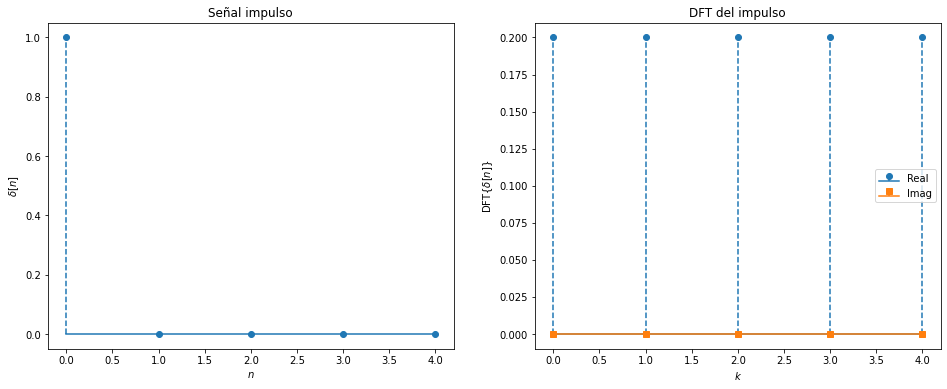

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sys_functions

%matplotlib inline

N = 5  # largo de la señal original
f = np.concatenate((np.ones(1),np.zeros(N-1))) # señal impulso
F = sys_functions.DFT(f) # DFT de la señal impulso

plt.figure(figsize = (16, 6))

plt.subplot(121)
sys_functions.plotSequence(f,'Señal impulso',xlabel='$n$',ylabel='$\delta[n]$')

plt.subplot(122)
sys_functions.plotSequence(F,'DFT del impulso',xlabel='$k$',ylabel='DFT{$\delta[n]$}')

**Ejercicio**

* Derive la $\text{DFT}_N \{ \delta[n - \kappa] \}$ del impulso de Dirac desplazado para $0 \leq \kappa < N$.

## Cálculo mediante código

En el siguiente código, se pude calcular la DFT de una secuencia arbitraria, específicando los valores de sus muestras.

Señal: [1 1 1 1 0 0 0 0]
DFT de la señal: [0.5  +0.j        0.125-0.3017767j 0.   +0.j        0.125-0.0517767j
 0.   +0.j        0.125+0.0517767j 0.   +0.j        0.125+0.3017767j]
DFT inversa: [1.00000000e+00+0.j 1.00000000e+00+0.j 1.00000000e+00+0.j
 1.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 5.55111512e-17+0.j 0.00000000e+00+0.j]


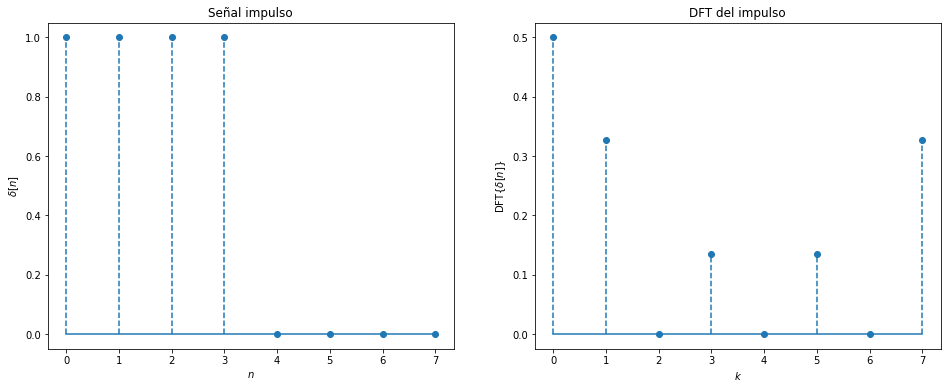

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import sys_functions

%matplotlib inline

f = np.array((1,1,1,1,0,0,0,0)) # Secuencia arbitraria
F = sys_functions.DFT(f) # DFT de la secuencia

print('Señal:', f)
print('DFT de la señal:', F)
print('DFT inversa:', sys_functions.IDFT(F))

plt.figure(figsize = (16, 6))

plt.subplot(121)
sys_functions.plotSequence(f,'Señal impulso',xlabel='$n$',ylabel='$\delta[n]$')

plt.subplot(122)
sys_functions.plotSequence(np.abs(F),'DFT del impulso',xlabel='$k$',ylabel='DFT{$\delta[n]$}')

<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>